In [83]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [55]:
data = pd.read_csv('/home/prashant/Desktop/solardata.csv',skiprows = 2)

In [56]:
#Changing the columns name because of the space problems
col_names =data.columns
col_names = data.columns.str.replace(' ','_')

col_names

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky_DHI', 'Clearsky_DNI', 'Clearsky_GHI', 'Dew_Point',
       'Temperature', 'Pressure', 'Relative_Humidity', 'Solar_Zenith_Angle',
       'Precipitable_Water', 'Snow_Depth', 'Wind_Direction', 'Wind_Speed',
       'Fill_Flag', 'Unnamed:_21', 'Unnamed:_22', 'Unnamed:_23', 'Unnamed:_24',
       'Unnamed:_25', 'Unnamed:_26', 'Unnamed:_27', 'Unnamed:_28',
       'Unnamed:_29', 'Unnamed:_30', 'Unnamed:_31', 'Unnamed:_32',
       'Unnamed:_33', 'Unnamed:_34'],
      dtype='object')

In [57]:
#Dropping the empty columms which are of no use

data.columns = col_names
drop_list = []

for col in col_names:
   
    if(data[col].isnull().sum() > data.shape[0]/2):
        drop_list.append(col)
        
data.drop(drop_list,axis =1,inplace =True)
data.head()       

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky_DHI,Clearsky_DNI,...,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Snow_Depth,Wind_Direction,Wind_Speed,Fill_Flag
0,2014,1,1,0,30,0,0,0,0,0,...,-4,11.470179,974.890503,31.764560,176.502940,1.148627,0,89.429634,3.827334,0
1,2014,1,1,1,30,0,0,0,0,0,...,-4,10.942517,974.722229,33.315156,166.155587,1.206034,0,88.038315,3.719974,0
2,2014,1,1,2,30,0,0,0,0,0,...,-4,10.462565,974.518005,34.873389,152.817241,1.253349,0,87.193565,3.481867,0
3,2014,1,1,3,30,0,0,0,0,0,...,-4,10.077782,974.263550,36.315791,139.419395,1.304086,0,87.497299,3.253181,0
4,2014,1,1,4,30,0,0,0,0,0,...,-4,9.786384,974.572876,37.494386,126.129768,1.370855,0,87.240990,3.103903,0


In [58]:
#Creating the new variable with name as Date_Time and this will contian all the information regarding date,year,and time

data['Date_Time'] = data.Year.astype(str) + "/" + data.Month.astype(str) + "/" + data.Day.astype(str) + " " + data.Hour.astype(str)+ ":" + data.Minute.astype(str)    
data['Date_Time']=pd.to_datetime(data['Date_Time'])

#Printing year,month,day and time of first 6 rows
print(data.Date_Time.head())

0   2014-01-01 00:30:00
1   2014-01-01 01:30:00
2   2014-01-01 02:30:00
3   2014-01-01 03:30:00
4   2014-01-01 04:30:00
Name: Date_Time, dtype: datetime64[ns]


In [59]:
#Droping the column [Year,Month,Day,Hour,Minute] because there information is covered in columnn 'Date_Time'
data.drop(['Year','Month','Day','Hour','Minute'],axis =1,inplace=True)
data.drop('Fill_Flag',axis =1,inplace=True)
data.head()


,DHI,DNI,GHI,Clearsky_DHI,Clearsky_DNI,Clearsky_GHI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Snow_Depth,Wind_Direction,Wind_Speed,Date_Time
0,0,0,0,0,0,0,-4,11.470179,974.890503,31.764560,176.502940,1.148627,0,89.429634,3.827334,2014-01-01 00:30:00
1,0,0,0,0,0,0,-4,10.942517,974.722229,33.315156,166.155587,1.206034,0,88.038315,3.719974,2014-01-01 01:30:00
2,0,0,0,0,0,0,-4,10.462565,974.518005,34.873389,152.817241,1.253349,0,87.193565,3.481867,2014-01-01 02:30:00
3,0,0,0,0,0,0,-4,10.077782,974.263550,36.315791,139.419395,1.304086,0,87.497299,3.253181,2014-01-01 03:30:00
4,0,0,0,0,0,0,-4,9.786384,974.572876,37.494386,126.129768,1.370855,0,87.240990,3.103903,2014-01-01 04:30:00


In [60]:
#Checking that is there any missing values is present or not in the data
print("The number of missing values in the column :-")
data.isnull().sum()


The number of missing values in the column :-


DHI                   0
DNI                   0
GHI                   0
Clearsky_DHI          0
Clearsky_DNI          0
Clearsky_GHI          0
Dew_Point             0
Temperature           0
Pressure              0
Relative_Humidity     0
Solar_Zenith_Angle    0
Precipitable_Water    0
Snow_Depth            0
Wind_Direction        0
Wind_Speed            0
Date_Time             0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
DHI                   8760 non-null int64
DNI                   8760 non-null int64
GHI                   8760 non-null int64
Clearsky_DHI          8760 non-null int64
Clearsky_DNI          8760 non-null int64
Clearsky_GHI          8760 non-null int64
Dew_Point             8760 non-null int64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative_Humidity     8760 non-null float64
Solar_Zenith_Angle    8760 non-null float64
Precipitable_Water    8760 non-null float64
Snow_Depth            8760 non-null int64
Wind_Direction        8760 non-null float64
Wind_Speed            8760 non-null float64
Date_Time             8760 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(8)
memory usage: 1.1 MB


1007


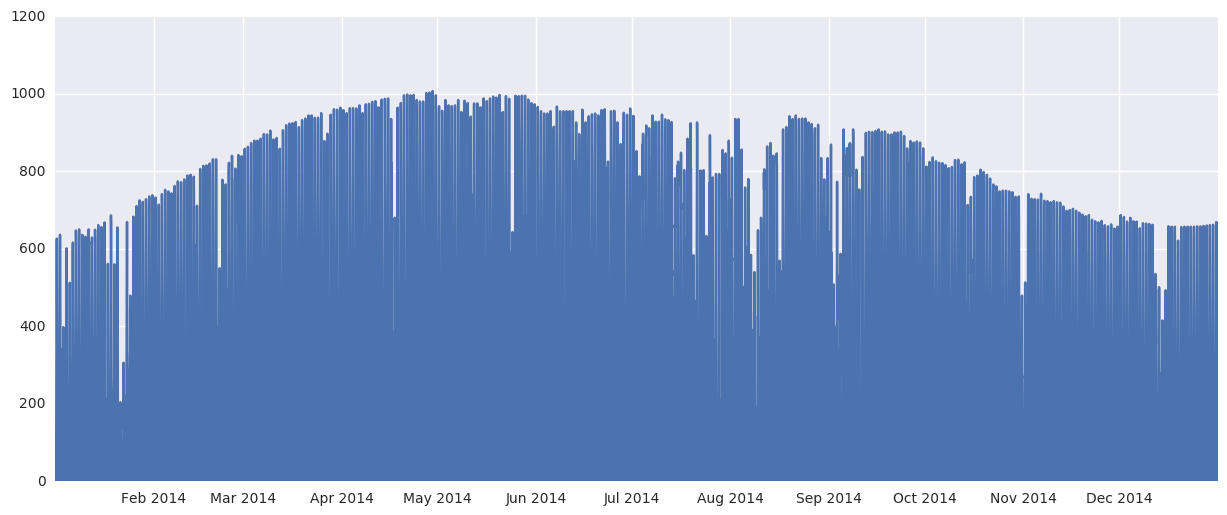

In [62]:
#Create a new Dataframae
time = data.Date_Time.dt.time
ts = data.loc[: ,['Date_Time','GHI']]
ts.set_index('Date_Time')
print(data.GHI.max())
plt.plot(data.Date_Time,data.GHI)

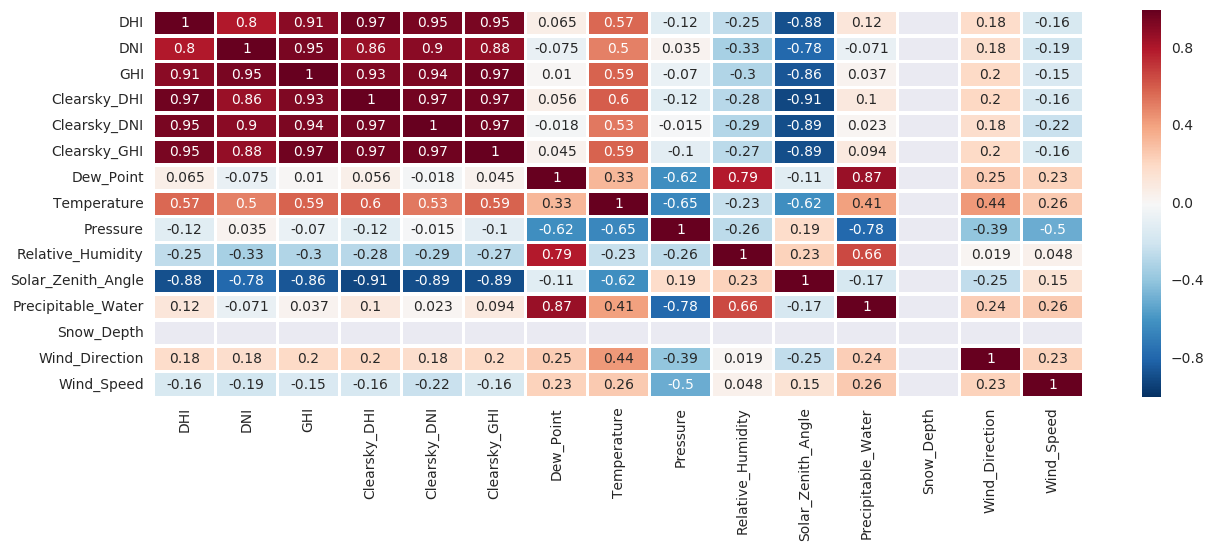

In [63]:
#print(data.head())
#plt.matshow(data.corr())

import seaborn as sns
corr = data.corr()
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(corr,annot =True ,linewidths=2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [64]:
data.head()


,DHI,DNI,GHI,Clearsky_DHI,Clearsky_DNI,Clearsky_GHI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Snow_Depth,Wind_Direction,Wind_Speed,Date_Time
0,0,0,0,0,0,0,-4,11.470179,974.890503,31.764560,176.502940,1.148627,0,89.429634,3.827334,2014-01-01 00:30:00
1,0,0,0,0,0,0,-4,10.942517,974.722229,33.315156,166.155587,1.206034,0,88.038315,3.719974,2014-01-01 01:30:00
2,0,0,0,0,0,0,-4,10.462565,974.518005,34.873389,152.817241,1.253349,0,87.193565,3.481867,2014-01-01 02:30:00
3,0,0,0,0,0,0,-4,10.077782,974.263550,36.315791,139.419395,1.304086,0,87.497299,3.253181,2014-01-01 03:30:00
4,0,0,0,0,0,0,-4,9.786384,974.572876,37.494386,126.129768,1.370855,0,87.240990,3.103903,2014-01-01 04:30:00


In [76]:
## Creating the first baseline model

from  sklearn.cross_validation import train_test_split

#Sepertating the target and response variables
X = data.loc[:,data.columns != 'GHI']
X = X.loc [ : , X.columns != 'Clearsky_GHI']
X = X.loc[: ,X.columns != 'Date_Time']
y = data.GHI


#Spliting the dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)


In [78]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
y_pred = linreg.predict(X_test)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

53.872146855495394